In [1]:
from sklearn import datasets,cross_validation,naive_bayes
import numpy as np
import matplotlib.pyplot as plt

S:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


观察我们所需要的数据集Digit Dataset

In [7]:
def show_digits():
    digits = datasets.load_digits()
    fig = plt.figure()
    print("vector from images 0:", digits.data[0])
    for i in range(25):
        ax = fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i],cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

vector from images 0: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


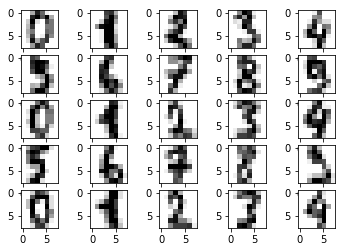

In [8]:
show_digits()

In [13]:
def load_data():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

---

1.高斯贝叶斯分类器 GaussianNB

In [14]:
def test_GaussianNB(*data):
    X_train,X_test,y_train,y_test = data
    cls = naive_bayes.GaussianNB()
    cls.fit(X_train,y_train)
    print('Training Score:%f'%cls.score(X_train,y_train))
    print('Testing Score:%f'%cls.score(X_test,y_test))

In [15]:
X_train,X_test,y_train,y_test = load_data()
test_GaussianNB(X_train,X_test,y_train,y_test)

Training Score:0.857461
Testing Score:0.833333


---

2.多项式贝叶斯分类器MultinomialNB

In [19]:
def test_MultinomialNB(*data):
    X_train,X_test,y_train,y_test = data
    cls = naive_bayes.MultinomialNB()
    cls.fit(X_train,y_train)
    print('Training Score:%f'%cls.score(X_train,y_train))
    print('Testing Score:%f'%cls.score(X_test,y_test))

In [21]:
X_train,X_test,y_train,y_test = load_data()
test_MultinomialNB(X_train,X_test,y_train,y_test)

Training Score:0.906459
Testing Score:0.908889


检验不同的$\alpha$对多项式贝叶斯分类器的影响：

In [24]:
def test_MultinomialNB_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas = np.logspace(-2,5,num=200)
    train_score=[]
    test_score=[]
    for alpha in alphas:
        cls=naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_score.append(cls.score(X_train,y_train))
        test_score.append(cls.score(X_test,y_test))
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas,train_score,label="Training Score")
    ax.plot(alphas,test_score,label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("Multinomial")
    ax.set_xscale("log")
    plt.show()

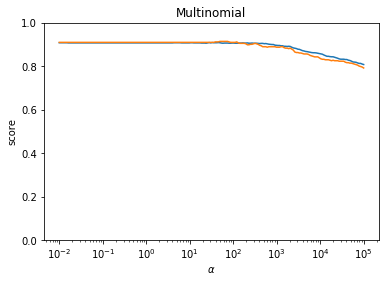

In [25]:
X_train,X_test,y_train,y_test = load_data()
test_MultinomialNB_alpha(X_train,X_test,y_train,y_test)

___

3.伯努利贝叶斯分类器BernoulliNB

In [26]:
def test_BernoulliNB(*data):
    X_train,X_test,y_train,y_test = data
    cls = naive_bayes.BernoulliNB()
    cls.fit(X_train,y_train)
    print('Training Score:%f'%cls.score(X_train,y_train))
    print('Testing Score:%f'%cls.score(X_test,y_test))

In [27]:
X_train,X_test,y_train,y_test = load_data()
test_BernoulliNB(X_train,X_test,y_train,y_test)

Training Score:0.867112
Testing Score:0.851111


检验不同的$\alpha$对伯努利贝叶斯分类器的影响：

In [29]:
def test_BernoulliNB_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas = np.logspace(-2,5,num=200)
    train_score=[]
    test_score=[]
    for alpha in alphas:
        cls=naive_bayes.BernoulliNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_score.append(cls.score(X_train,y_train))
        test_score.append(cls.score(X_test,y_test))
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas,train_score,label="Training Score")
    ax.plot(alphas,test_score,label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("BernoulliNB")
    ax.set_xscale("log")
    ax.legend(loc="best")
    plt.show()

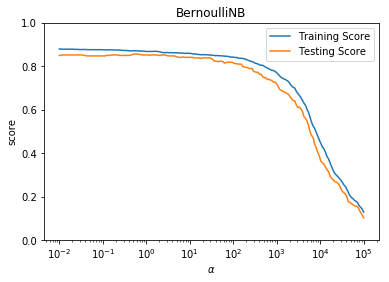

In [30]:
X_train,X_test,y_train,y_test = load_data()
test_BernoulliNB_alpha(X_train,X_test,y_train,y_test)

考察binarize参数对伯努利贝叶斯分类器的预测性能的影响：

In [33]:
def test_BernoulliNB_binarize(*data):
    X_train,X_test,y_train,y_test = data
    min_x=min(np.min(X_train.ravel()), np.min(X_test.ravel())) - 0.1
    max_x=min(np.max(X_train.ravel()), np.max(X_test.ravel())) + 0.1
    binarizes = np.linspace(min_x,max_x,endpoint=True,num=100)
    train_score=[]
    test_score=[]
    for binarize in binarizes:
        cls=naive_bayes.BernoulliNB(binarize=binarize)
        cls.fit(X_train,y_train)
        train_score.append(cls.score(X_train,y_train))
        test_score.append(cls.score(X_test,y_test))
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(binarizes,train_score,label="Training Score")
    ax.plot(binarizes,test_score,label="Testing Score")
    ax.set_xlabel("binarize")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_xlim(min_x-1,max_x+1)
    ax.set_title("BernoulliNB")
    ax.set_xscale("log")
    ax.legend(loc="best")
    plt.show()

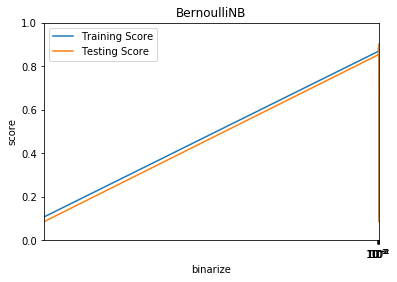

In [36]:
X_train,X_test,y_train,y_test = load_data()
test_BernoulliNB_binarize(X_train,X_test,y_train,y_test)